In [1]:
from rl_sim import *
from tqdm import tqdm
import pickle

In [2]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
env_init_info = {
    "configfile": 'network_2.xml',
    "time_step": 30,
    "plot_precision": 2
}


agent_init_info = {
            "num_tilings": 3,
            "num_tiles": 2,
            "epsilon": 1,
            "discount": 0.95,
            "step_size": 0.1
}

rl_glue = rlGlue(env_init_info, agent_init_info, "linear_q_learning", num_rewards = 300)

100%|██████████| 999/999 [00:22<00:00, 45.03it/s]


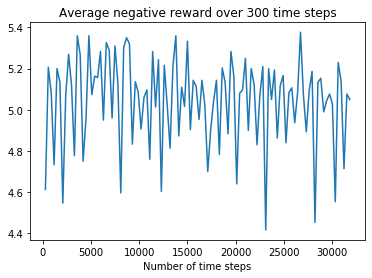

100%|██████████| 999/999 [00:20<00:00, 48.31it/s]


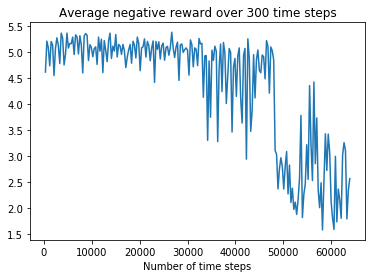

100%|██████████| 999/999 [00:19<00:00, 50.05it/s]


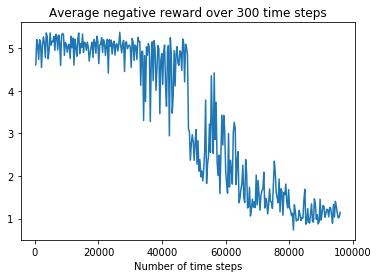

100%|██████████| 999/999 [00:18<00:00, 53.40it/s]


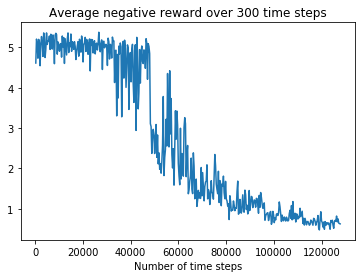

100%|██████████| 999/999 [00:18<00:00, 54.09it/s]


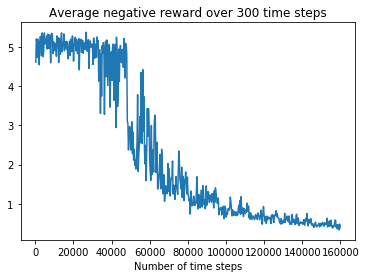

In [4]:
num_runs = 160
for i in range(num_runs):
    rl_glue.train_agent("initial", 1000)
    if (i+1) % (num_runs/5) == 0:
        rl_glue.plot_avg_reward()
    if (i+1) % (num_runs/10) == 0:
        rl_glue.agent.epsilon -= 0.1

In [5]:
np.set_printoptions(threshold=sys.maxsize)
rl_glue.agent.w.T

array([[ 4.01679573e-01,  4.52763905e-01,  4.12827645e-01,
         6.87462846e-01,  1.53647465e-01,  4.73110870e-01,
         4.07382876e-01, -2.53246199e-02],
       [-9.07959011e-01, -1.49718169e-02, -8.21597035e-01,
         8.24869771e-01, -6.32445528e-01,  3.08067341e-01,
        -7.66359950e-01,  0.00000000e+00],
       [-1.29953010e+00, -1.32254311e+00,  7.04842026e-02,
        -8.66178601e-01, -1.79068311e-02, -1.14968937e+00,
         6.17211352e-01, -9.96859612e-01],
       [-7.76397913e-02, -9.19299233e-02, -6.80156699e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-6.83627097e-01, -3.10904157e-01,  6.65906916e-01,
         7.55232631e-01, -7.39220154e-01, -7.11170419e-01,
         4.10117757e-01,  0.00000000e+00],
       [-1.07348986e+00, -3.00111042e-01, -3.41842519e-01,
         1.01371693e+00, -9.99140327e-01,  3.60204465e-02,
         3.36379740e-03,  0.00000000e+00],
       [-1.98755109e+00, -1.740337

In [4]:
# save_obj(rl_glue.agent.w.T, "weights_1_3int")

In [5]:
rl_glue.agent.w = load_obj("weights_1_3int").T

In [7]:
rl_glue.test_policy("initial", 300, policy = "random")

100%|██████████| 300/300 [02:37<00:00,  1.91it/s]


-1.7132311111111116

In [6]:
rl_glue.test_policy("initial", 300)

100%|██████████| 300/300 [02:50<00:00,  1.76it/s]


-0.47427888888888875

In [7]:
rl_glue.get_signal_info(1,0, start=500)

{'green_time': 187.69230769230768,
 'red_time': 30.0,
 'cycle': 217.69230769230768,
 'gtime_ratio': 0.8621908127208481}

In [8]:
rl_glue.get_signal_info(2,0, start=500)

{'green_time': 198.33333333333334,
 'red_time': 30.81081081081081,
 'cycle': 229.14414414414415,
 'gtime_ratio': 0.8655396107725575}

In [9]:
rl_glue.get_signal_info(3,0, start=500)

{'green_time': 197.02702702702703,
 'red_time': 32.5,
 'cycle': 229.52702702702703,
 'gtime_ratio': 0.8584044745363556}

In [10]:
rl_glue.get_offsets(start=500)

C:\Users\fellipefcm\Documents\Google Drive\UC Berkeley\Capstone\capstone-project\src\rl-sim\rl_sim.py:137: RuntimeWarning: Mean of empty slice.
  min_len = min(l, len_ref)
C:\Users\fellipefcm\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: 0, 2: nan, 3: nan}

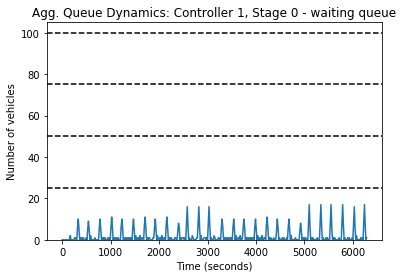

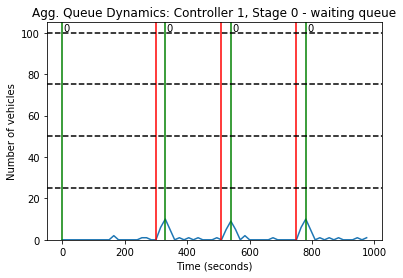

In [13]:
rl_glue.env.plot_agg_queue(1, 0, "waiting", plot_signals = False, end = 6300)
rl_glue.env.plot_agg_queue(1, 0, "waiting", end = 1000)

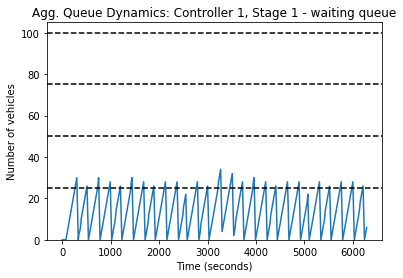

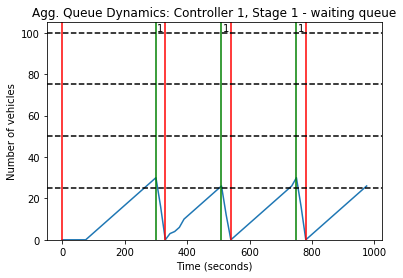

In [14]:
rl_glue.env.plot_agg_queue(1, 1, "waiting", plot_signals = False, end = 6300)
rl_glue.env.plot_agg_queue(1, 1, "waiting", end = 1000)

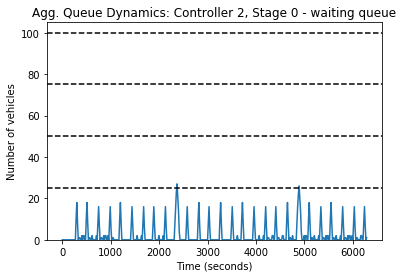

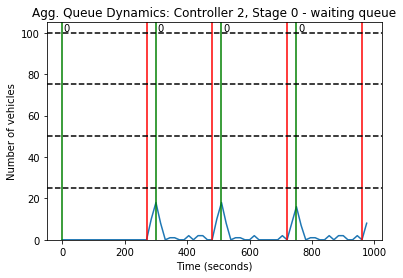

In [15]:
rl_glue.env.plot_agg_queue(2, 0, "waiting", plot_signals = False, end = 6300)
rl_glue.env.plot_agg_queue(2, 0, "waiting", end = 1000)

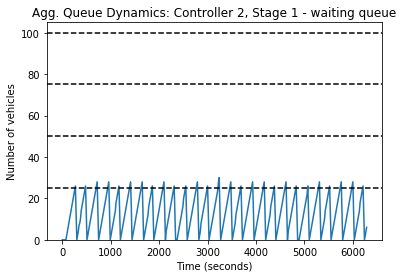

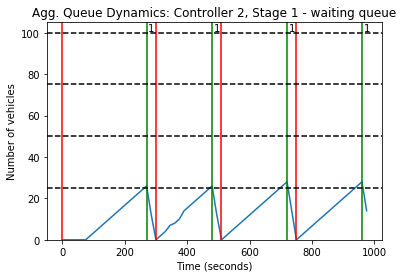

In [16]:
rl_glue.env.plot_agg_queue(2, 1, "waiting", plot_signals = False, end = 6300)
rl_glue.env.plot_agg_queue(2, 1, "waiting", end = 1000)

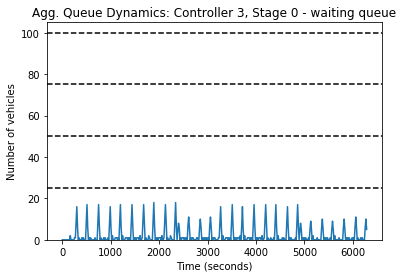

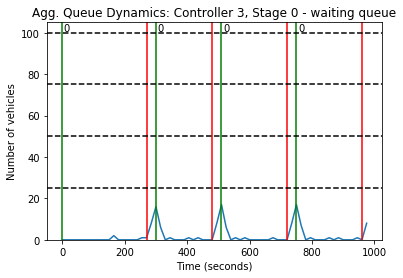

In [17]:
rl_glue.env.plot_agg_queue(3, 0, "waiting", plot_signals = False, end = 6300)
rl_glue.env.plot_agg_queue(3, 0, "waiting", end = 1000)

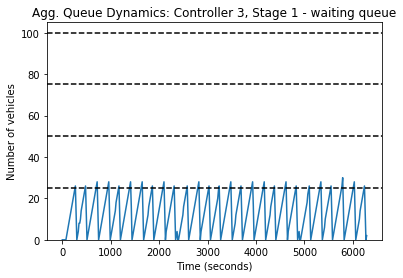

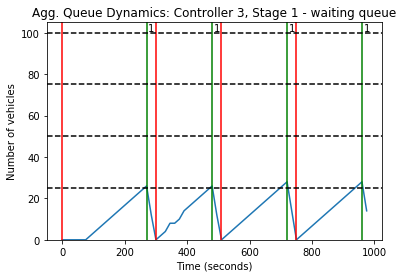

In [18]:
rl_glue.env.plot_agg_queue(3, 1, "waiting", plot_signals = False, end = 6300)
rl_glue.env.plot_agg_queue(3, 1, "waiting", end = 1000)